In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('D:\Datasets\strength.csv',',', error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [24]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [25]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [26]:
data.dropna(inplace = True)

In [27]:
data.isna().sum()

password    0
strength    0
dtype: int64

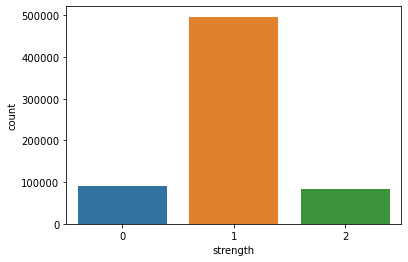

In [28]:
sns.countplot(data['strength'])

In [29]:
data['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

In [30]:
password_tuple = np.array(data)

In [31]:
import random
random.shuffle(password_tuple)

In [32]:
X = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [33]:
def char_tokenizer(input):
    characters = []
    for i in input:
        characters.append(i)
    return characters

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = char_tokenizer)
X = tfidf.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(penalty='l2',multi_class='ovr')
logReg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [38]:
print(logReg.score(X_test,y_test))

0.8115778627322143


In [16]:
import joblib
joblib.dump(logReg,'LogisticRegression_model.joblib')

['LogisticRegression_model.joblib']

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X,y)

BernoulliNB()

In [21]:
print(bnb.score(X,y))

0.8118224894308724


In [19]:
import joblib
joblib.dump(bnb,'NaiveBayes_model.joblib')

['NaiveBayes_model.joblib']

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X,y)

DecisionTreeClassifier()

In [21]:
print(dtc.score(X,y))

0.9998431990968268


In [22]:
import joblib
joblib.dump(logReg,'DecisionTree_model.joblib')

['DecisionTree_model.joblib']

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=50, criterion='entropy')
rfc.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=50)

In [24]:
print(rfc.score(X,y))

0.9998387190710218


In [25]:
import joblib
joblib.dump(rfc,'RandomForest_model.joblib')

['RandomForest_model.joblib']

In [41]:
X_pred = ['aryan12345']
X_pred = tfidf.transform(X_pred)
y_pred = logReg.predict(X_pred)
print(y_pred)

[1]
